# <center> Heart Disease Prediction Classifier
   
<b>Author: C Koushik


# Problem Statement
### Build a classification model that predicts heart disease in a subject. (note the target column to predict is 'TenYearCHD' where CHD = Coronary heart disease) 

# Attributes

1.	sex: male(0) or female(1);(Nominal)
2.	age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
3.	currentSmoker: whether or not the patient is a current smoker (Nominal)
4.	cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)
5.	BPMeds: whether or not the patient was on blood pressure medication (Nominal)
6.	prevalentStroke: whether or not the patient had previously had a stroke (Nominal)
7.	prevalentHyp: whether or not the patient was hypertensive (Nominal)
8.	diabetes: whether or not the patient had diabetes (Nominal)
9.	totChol: total cholesterol level (Continuous)
10.	sysBP: systolic blood pressure (Continuous)
11.	diaBP: diastolic blood pressure (Continuous)
12.	BMI: Body Mass Index (Continuous)
13.	heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
14.	glucose: glucose level (Continuous)
15.	10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) - Target Variable


# Importing Libraries

In [395]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Reading dataset

In [396]:
df=pd.read_csv("C:\\Users\\DELL\\Desktop\\framingham.csv")

In [397]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Preprocessing

In [398]:
#Duplicates
df.duplicated().sum()

0

<b> No duplicates

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


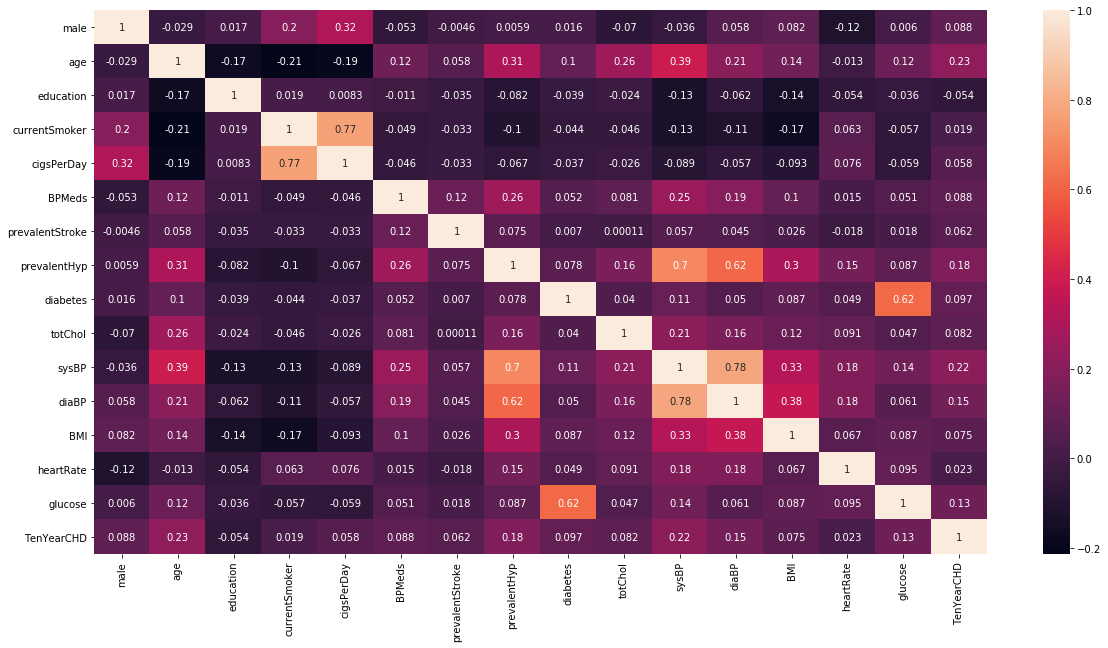

In [399]:
#Checking relationship between variables
cor=df.corr()
plt.figure(figsize=(20,10))
sn.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
cor

<b>Since correlation coefficient between education and and target variable TenYearCHD is insignificant, we can therefore remove education column

In [400]:
df=df.drop(['education'],axis=1)

In [401]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [402]:
# Check missing/null values
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [403]:
#Drop rows with null values
df=df.dropna()
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<b>No null values

In [404]:
#columns
print(df.columns,"\n")

#Dimensions
print(df.shape,"\n")

#Column datatypes
print(df.dtypes)

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object') 

(3751, 15) 

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


# Exploratory Data Analysis

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


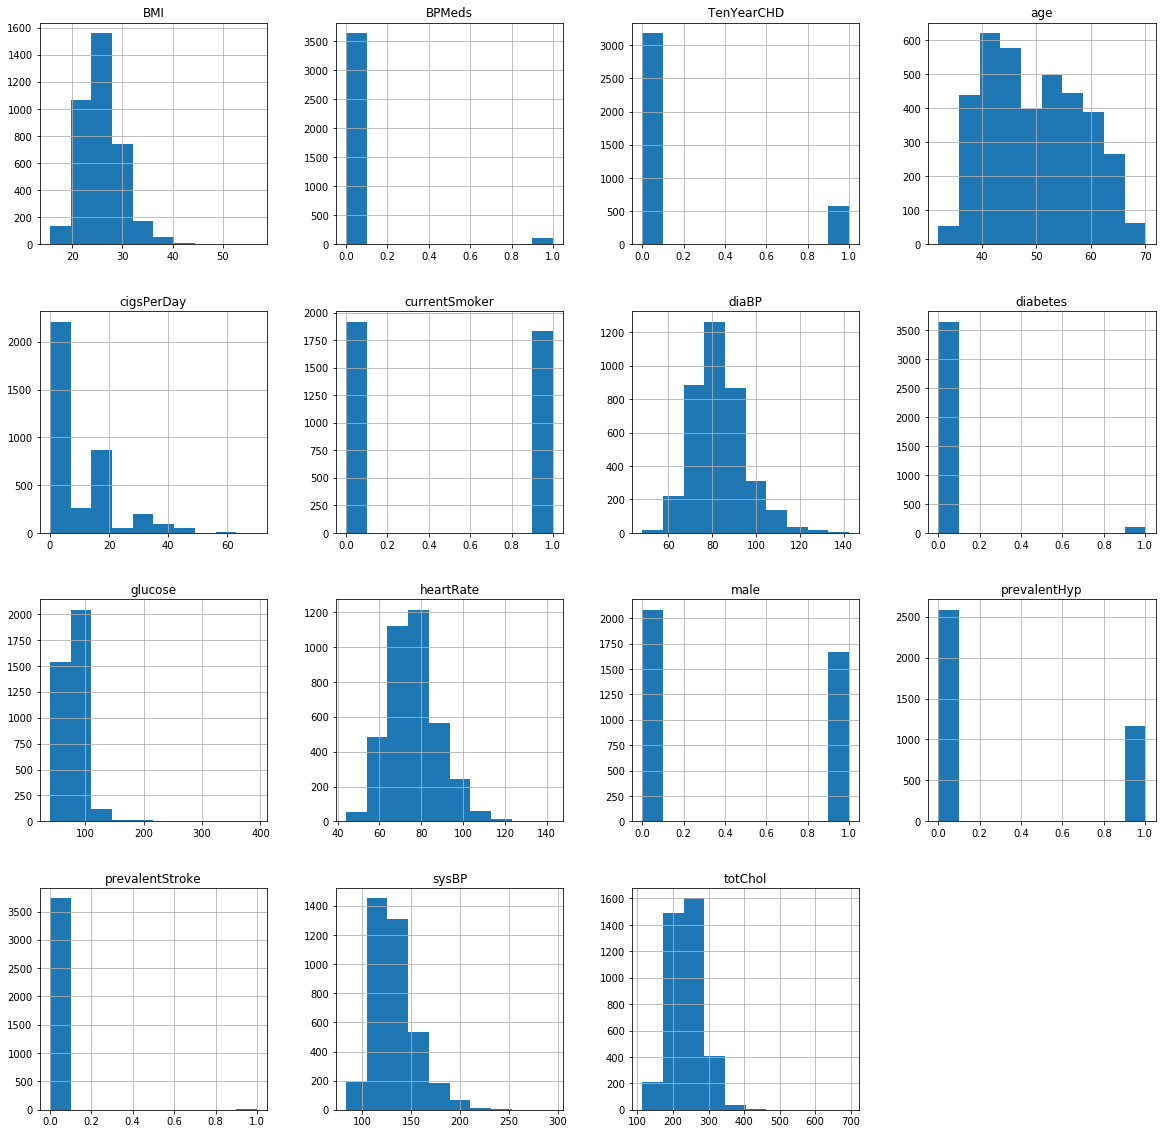

In [405]:
#Distributions of variables
fig=plt.figure(figsize=(20,20))
ax=fig.gca()
df.hist(ax=ax)
plt.show()

<b> The above grid of plots show the distribution of all the attribues in the dataset with the help of histograms

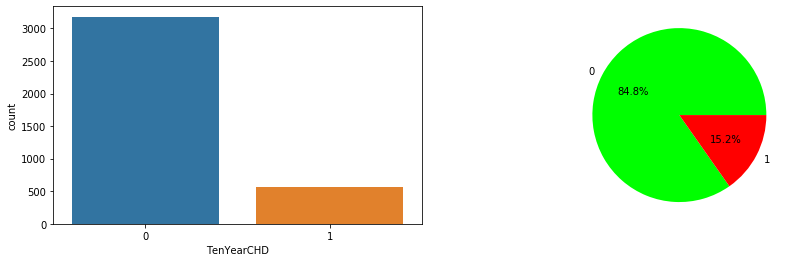

In [406]:
#Distribution of outcome variable, Heart Disease
plt.subplots_adjust(right=2)
plt.subplot(121)
sn.countplot(x="TenYearCHD", data=df)
plt.subplot(122)
labels=[0,1]
plt.pie(df["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()

<b> The distribution is highly imbalanced. As in, the number of negative cases outweigh the number of positive cases. This would lead to class imbalance problem while fitting our models. Therefore, this problem needs to be addressed and taken care of.

# Resampling imbalanced dataset by oversampling positive cases

In [407]:
target1=df[df['TenYearCHD']==1]
target0=df[df['TenYearCHD']==0]

In [408]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [409]:
target=pd.concat([target0,target1])

In [410]:
target['TenYearCHD'].value_counts()

1    3179
0    3179
Name: TenYearCHD, dtype: int64

In [411]:
df=target
np.shape(df)

(6358, 15)

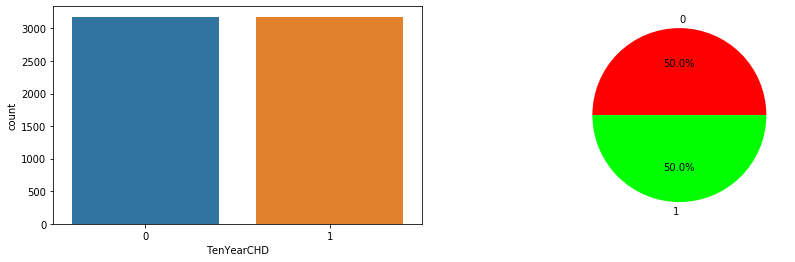

In [412]:
#Distribution of heart disease cases in the balanced dataset, the outcome variable
plt.subplots_adjust(right=2)
plt.subplot(121)
sn.countplot(x="TenYearCHD", data=df)
plt.subplot(122)
labels=[0,1]
plt.pie(df["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["red","lime"])
plt.show()

<b> The number of positive and negative cases are equal. Hence the classes are now balanced for model fitting

# Analysis of each attribute

In [413]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [414]:
df["male"].nunique()

2

In [415]:
print("Number of males: ",len(df[df["male"]==1]))
print("\nOthers: ",len(df[df["male"]!=1]))

Number of males:  3144

Others:  3214


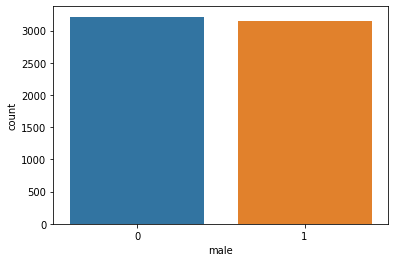

In [416]:
#Distribution of male and not male
sn.countplot(df["male"])

<b> From this plot we can see that majority are female

In [417]:
df["age"].nunique()

39

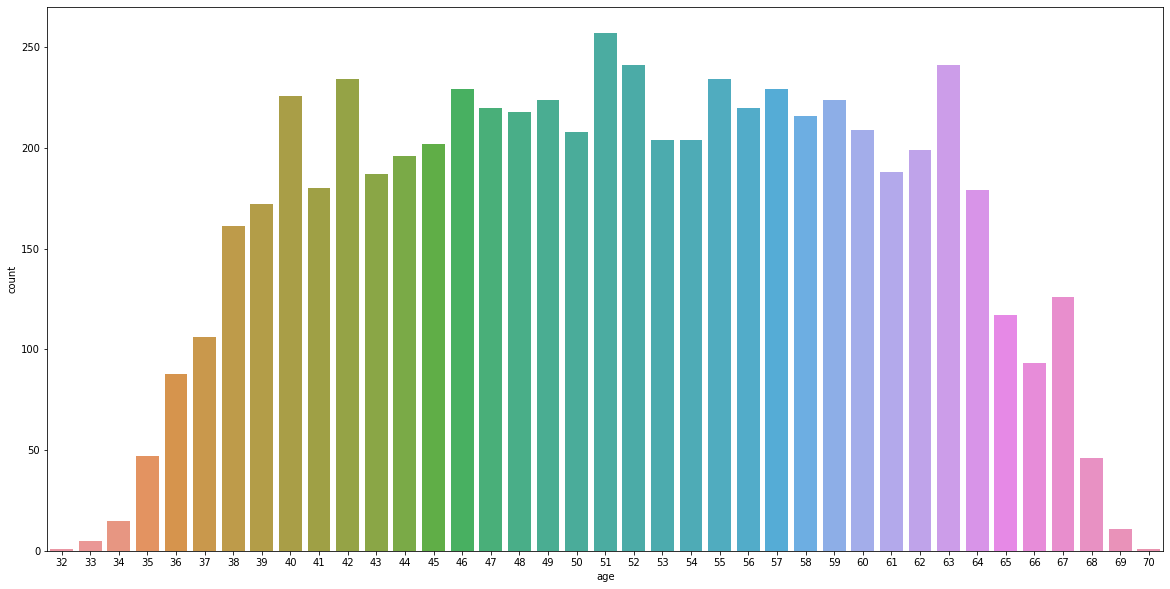

In [418]:
#Distribution of age
plt.figure(figsize=(20,10))
sn.countplot(x="age",data=df)
plt.show()

<b> The above plot shows the distribution of people of various ages. Majority of the people are aged 51

In [419]:
#Mode
df["age"].mode()

0    51
dtype: int64

In [420]:
#Median
df["age"].median()

52.0

In [421]:
#Mean
df["age"].mean()

51.52028939918213

In [422]:
df["age"].describe()

count    6358.000000
mean       51.520289
std         8.671653
min        32.000000
25%        44.000000
50%        52.000000
75%        59.000000
max        70.000000
Name: age, dtype: float64

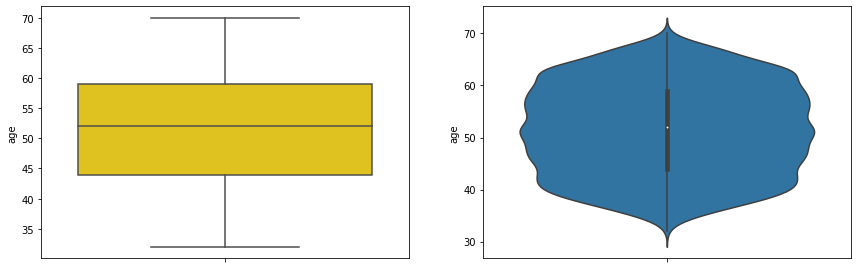

In [423]:
#Boxplot and violinplot distribution of age
plt.subplots_adjust(right=2,top=1)
plt.subplot(121)
sn.boxplot(df["age"],color="gold",orient="v")
plt.subplot(122)
sn.violinplot(x="age",data=df,orient="v")
plt.show()

<b> The boxplot and violinplot confirm the distribution with respect to statistical results above

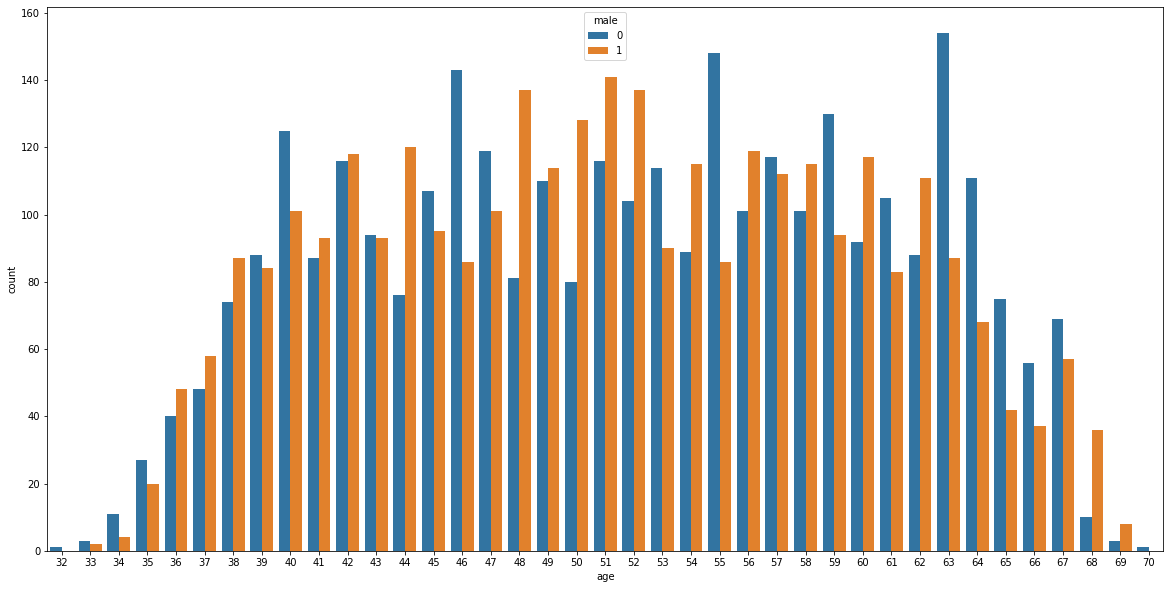

In [424]:
#Distribution of ages with respect to gender
plt.figure(figsize=(20,10))
sn.countplot(x="age",data=df,hue="male")
plt.show()

<b> From the above distribution we can see that, majority of males are aged 51 and females aged 63 but majority when combined together are aged 51

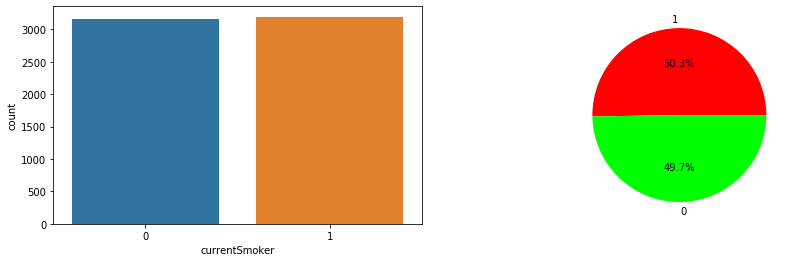

In [426]:
#Distribution of current smokers
plt.subplots_adjust(right=2)
plt.subplot(121)
sn.countplot(x="currentSmoker", data=df)
plt.subplot(122)
labels=[1,0]
plt.pie(df["currentSmoker"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["red","lime"])
plt.show()

<b> Majority are smokers currently

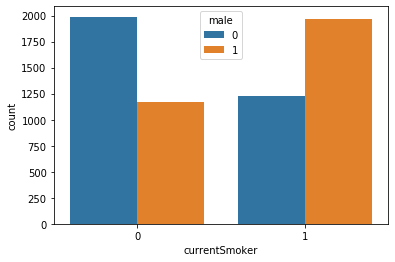

In [428]:
#Distribution of currentsmokers with respect to gender
sn.countplot(x="currentSmoker", data=df, hue="male")
plt.show()

<b>

<b> Majority of males of current smokers

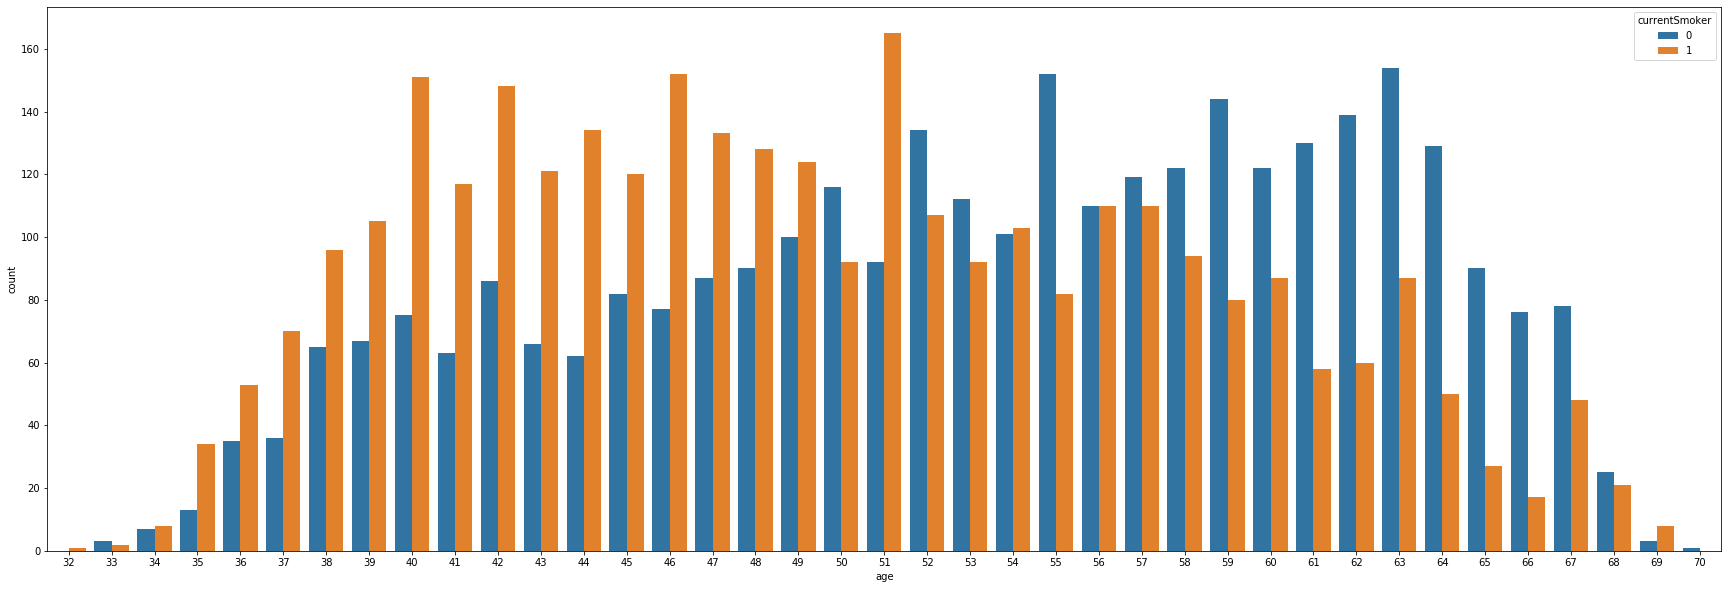

In [429]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,10))
sn.countplot(x="age",data=df,hue="currentSmoker")
plt.show()

<b> Most current smokers are aged 51

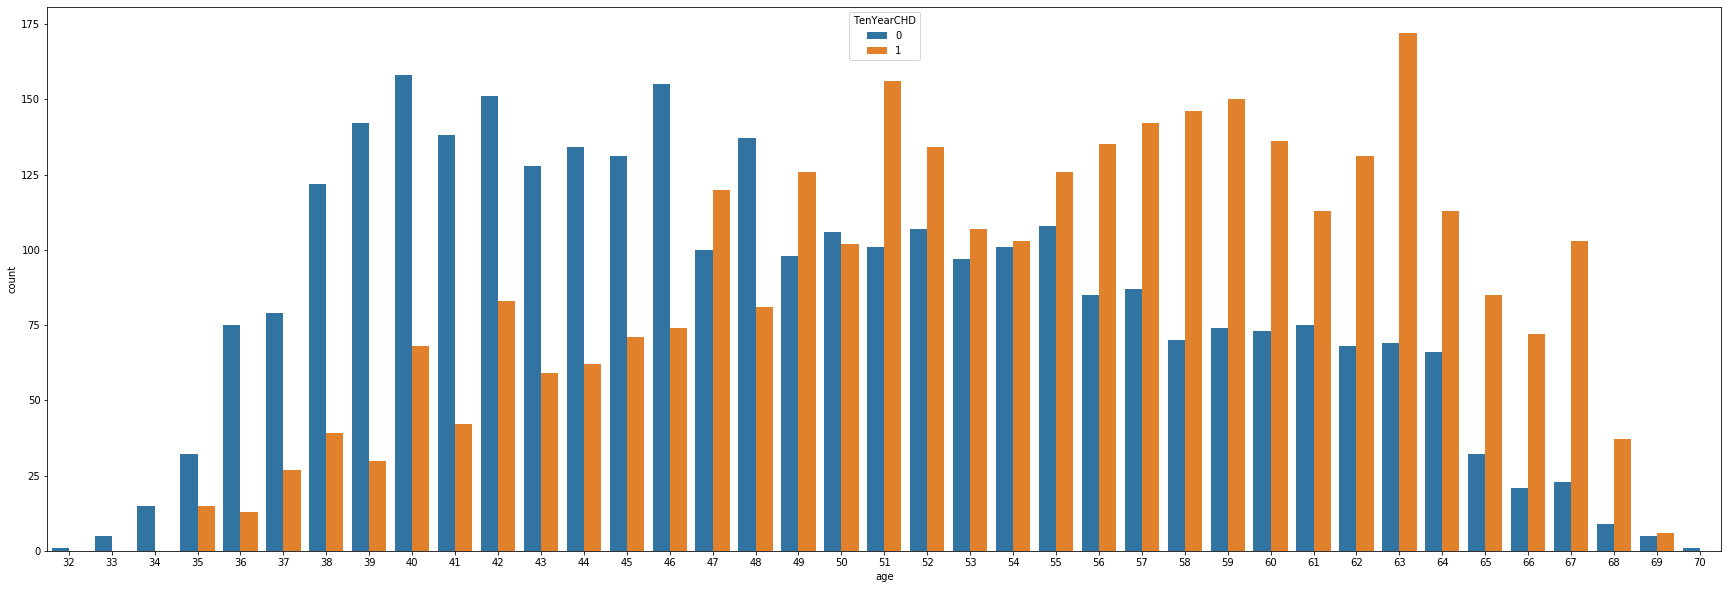

In [430]:
#Distribution of age and heart disease condition
plt.figure(figsize=(30,10))
sn.countplot(x="age",data=df,hue="TenYearCHD")
plt.show()

<b> Most heart disease patients are aged 63

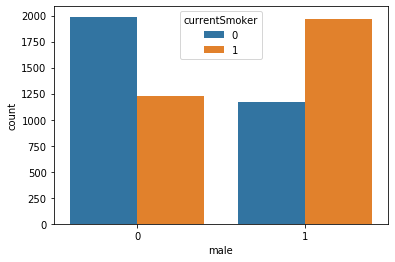

In [431]:
#Distribution of gender and heart disease condition
sn.countplot(x="male",data=df,hue="currentSmoker")
plt.show()

<b> Most people with heat disease are males

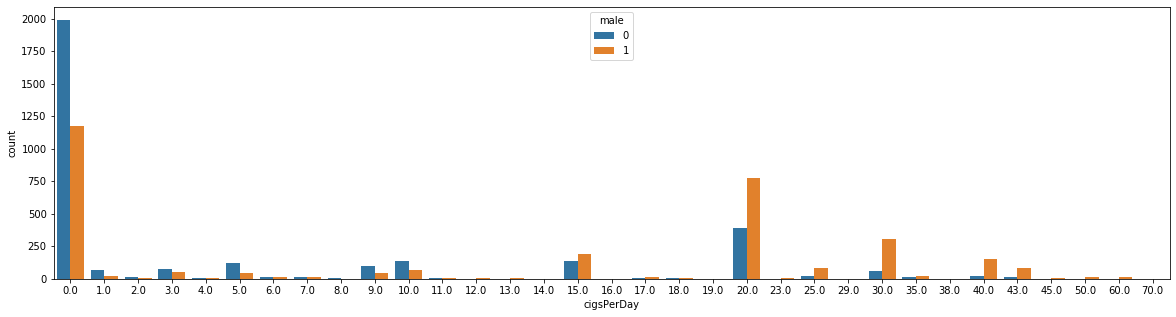

In [434]:
#Distribution of cigsPerDay with respect to gender
plt.figure(figsize=(20,5))
sn.countplot(x="cigsPerDay",data=df,hue="male")

<b> Males consume more cigarettes per day than others. This supports our conclusion earlier that majority of current smokers are males

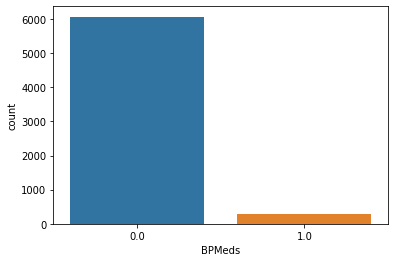

In [435]:
#Distribution of BPMeds
sn.countplot(df['BPMeds'])
plt.show()

<b> We can clearly observe that almost everyone doesn't require medications for BP

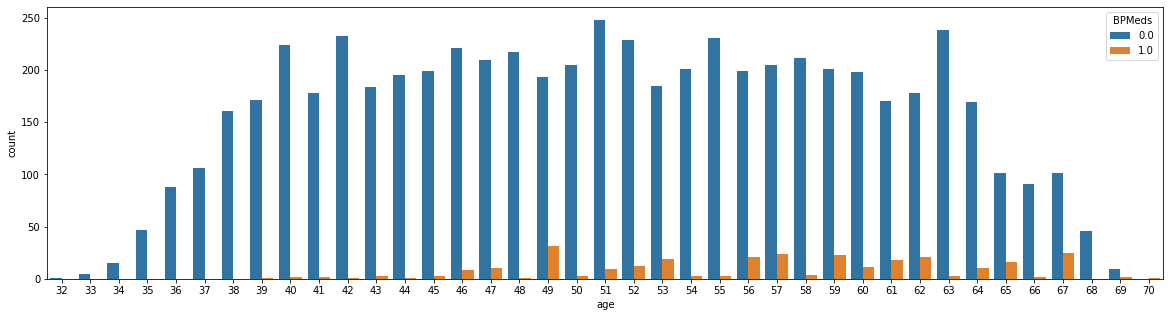

In [436]:
#Distribution of BP Meds with respect to age
plt.figure(figsize=(20,5))
sn.countplot(x="age", data=df, hue="BPMeds")
plt.show()

<b> We can observe that, among those who require medication are the elderly

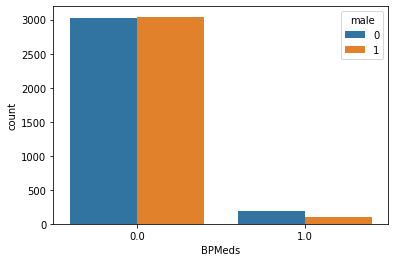

In [437]:
sn.countplot(x="BPMeds",data=df,hue="male")
plt.show()

<b> Majority among those who needed medication are females

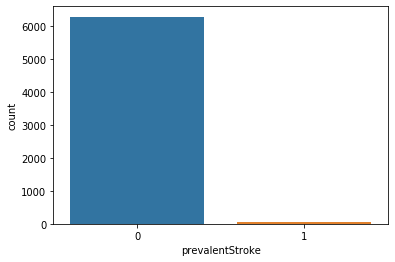

In [438]:
df["prevalentStroke"].nunique()
sn.countplot(df['prevalentStroke'])
plt.show()

<b> Very few inidividuals experienced strokes before

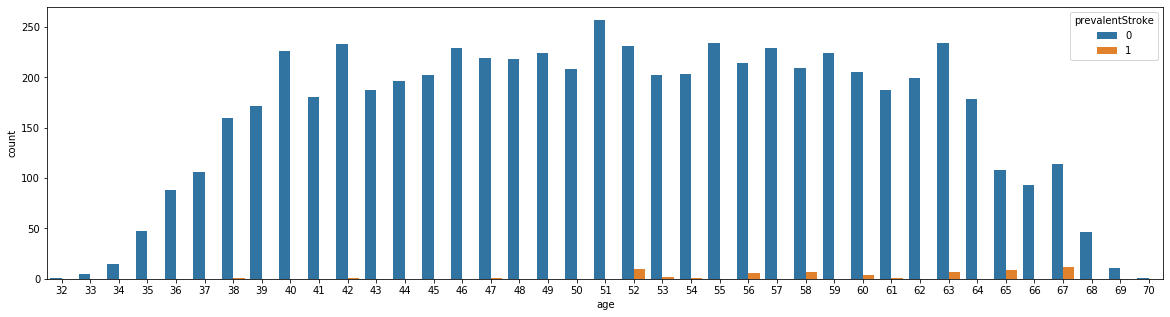

In [439]:
#Distribution of prevalentStrokes with respect to age
plt.figure(figsize=(20,5))
sn.countplot(x="age", data=df, hue="prevalentStroke")
plt.show()

<b> Out of the few, most people who experienced strokes previously are above the age of 50

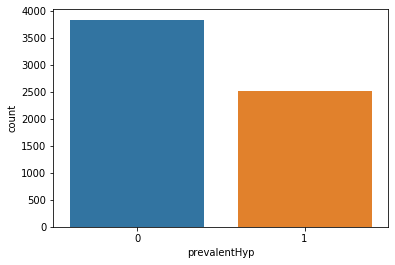

In [440]:
#Distribution of prevalentHyp
sn.countplot(df["prevalentHyp"])

<b> Most individuals werent hypertensive before

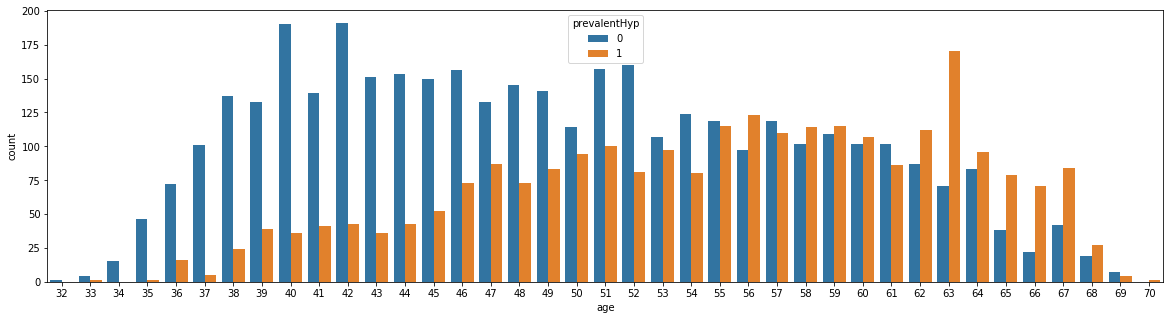

In [441]:
#Distribution of prevalentHyp vs age
plt.figure(figsize=(20,5))
sn.countplot(x="age", data=df, hue="prevalentHyp")
plt.show()

<b> Most individuals who were hypertensive before are aged 63

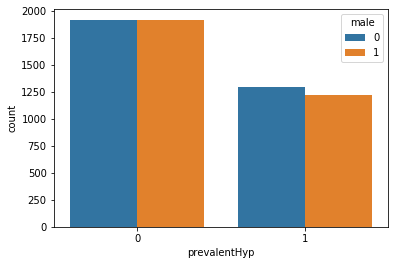

In [442]:
sn.countplot(x="prevalentHyp", data=df, hue="male")
plt.show()

<b> More females were hypertensive before than males

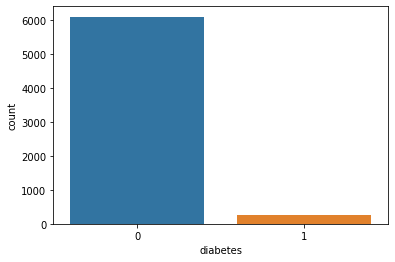

In [443]:
#Distribution of diabetes
sn.countplot(df["diabetes"])
plt.show()

<b> Most individuals were non diabetic

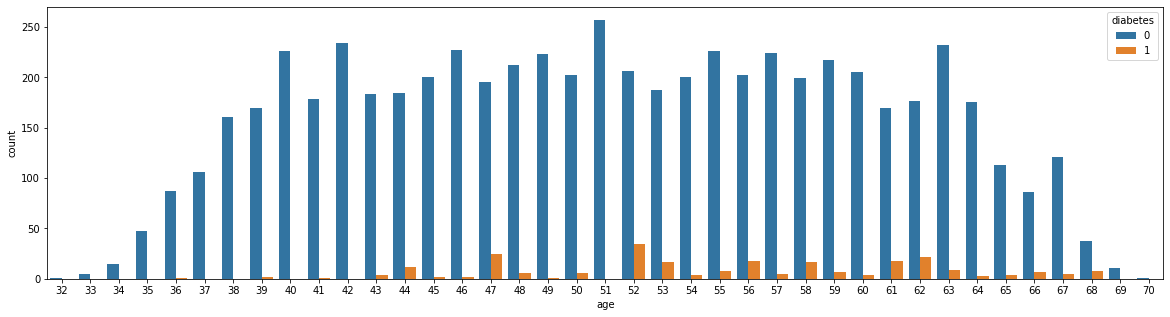

In [444]:
#Distribution of diabetes in age groups
plt.figure(figsize=(20,5))
sn.countplot(x="age", data=df, hue="diabetes")
plt.show()

<b> Most diabetic cases are people of age 52

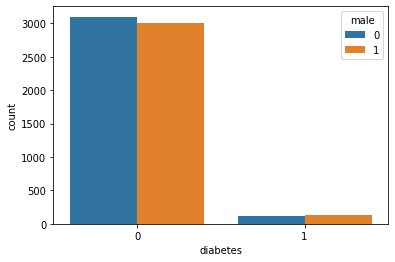

In [445]:
#Distribution of diabetes vs gender
sn.countplot(x="diabetes", data=df, hue="male")
plt.show()

<b> Equal number of males and others are diabetic

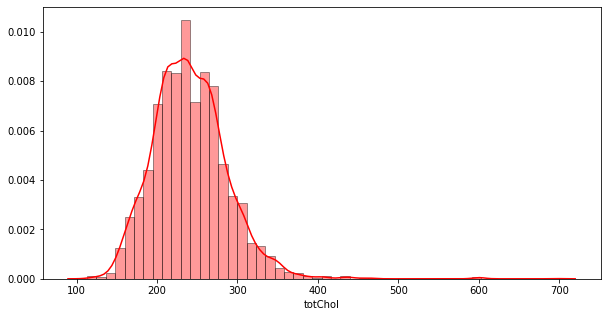

In [446]:
#Distribution of Total cholesterol
plt.figure(figsize=(10,5))
sn.distplot(df["totChol"],color='red',hist_kws=dict(edgecolor="black", linewidth=1))
plt.show()

<b> Most people have total cholesterol reading between 220-270

In [447]:
df["totChol"].describe()

count    6358.000000
mean      241.044039
std        46.110703
min       113.000000
25%       210.000000
50%       238.000000
75%       268.000000
max       696.000000
Name: totChol, dtype: float64

<b> Range of cholesterol 113-696

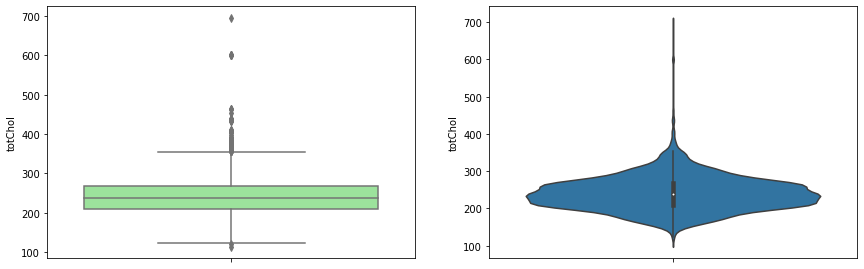

In [449]:
#Boxplot and violinplot distribution of cholesterol
plt.subplots_adjust(right=2,top=1)
plt.subplot(121)
sn.boxplot(df["totChol"],color="lightgreen",orient="v")
plt.subplot(122)
sn.violinplot(x="totChol",data=df,orient="v")
plt.show()

<b> The above plots and stastical measures suggest that there are outliers in this column. Therefore they must be dropped

In [451]:
#Outliers in totChol
outliers=df[df['totChol']>500]
outliers

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3160,1,51,1,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0
1111,0,52,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
1111,0,52,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
1111,0,52,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
1111,0,52,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
1111,0,52,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
1111,0,52,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1


In [452]:
#Dropping outlier
df=df.drop(df[df['totChol']>500].index)

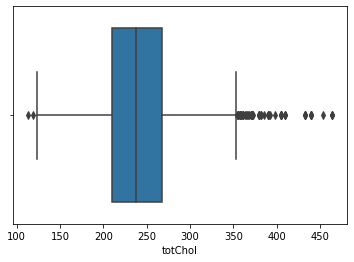

In [453]:
sn.boxplot(df['totChol'])
plt.show()

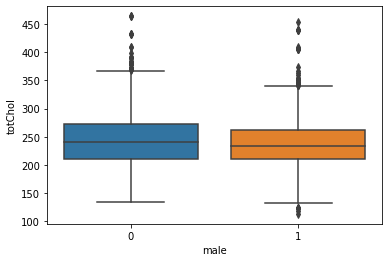

In [454]:
sn.boxplot(x="male",y="totChol",data=df)
plt.show()

<b>The plot suggests that, females have more cholesterol since the boxplot for females is bigger than males

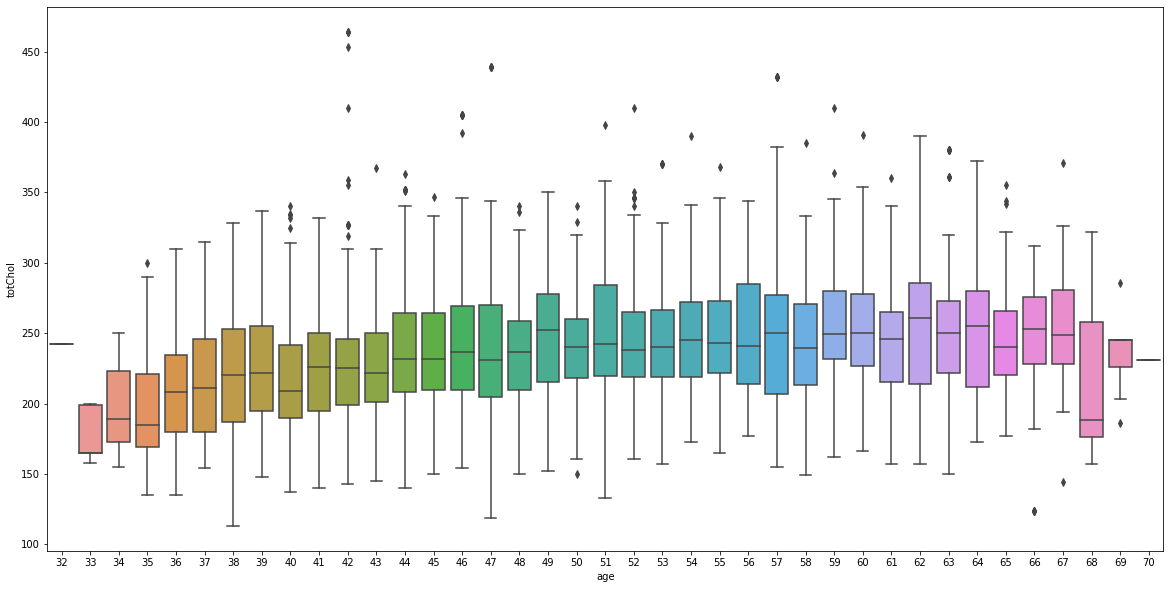

In [455]:
plt.figure(figsize=(20,10))
sn.boxplot(x="age",y="totChol",data=df)
plt.show()

<b> The boxplots are shifted in an upwardly manner suggesting that aged people have more cholesterol (bad cholesterol in general)

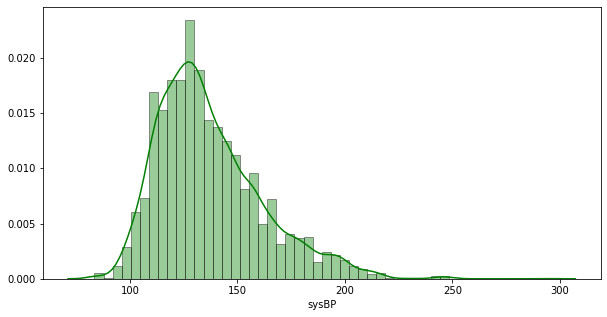

In [456]:
#Distribution of Systolic bp
plt.figure(figsize=(10,5))
sn.distplot(df["sysBP"],color='green',hist_kws=dict(edgecolor="black", linewidth=1))
plt.show()

<b>
    Most people have systolic bp within the range 120-135

In [458]:
df["sysBP"].describe()

count    6351.000000
mean      137.018107
std        24.508300
min        83.500000
25%       120.000000
50%       132.000000
75%       150.000000
max       295.000000
Name: sysBP, dtype: float64

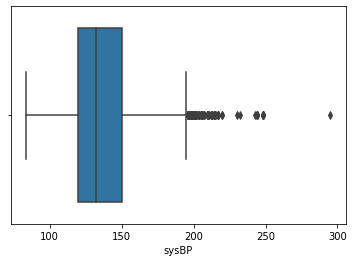

In [459]:
sn.boxplot(df['sysBP'])
plt.show()

<b> The value 295 is an outlier, it should be removed

In [461]:
df=df.drop(df[df['sysBP']==295].index)

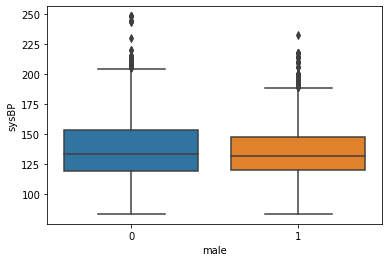

In [462]:
sn.boxplot(x="male",y="sysBP",data=df)
plt.show()

<b>Females in general have higher systolic bp than male

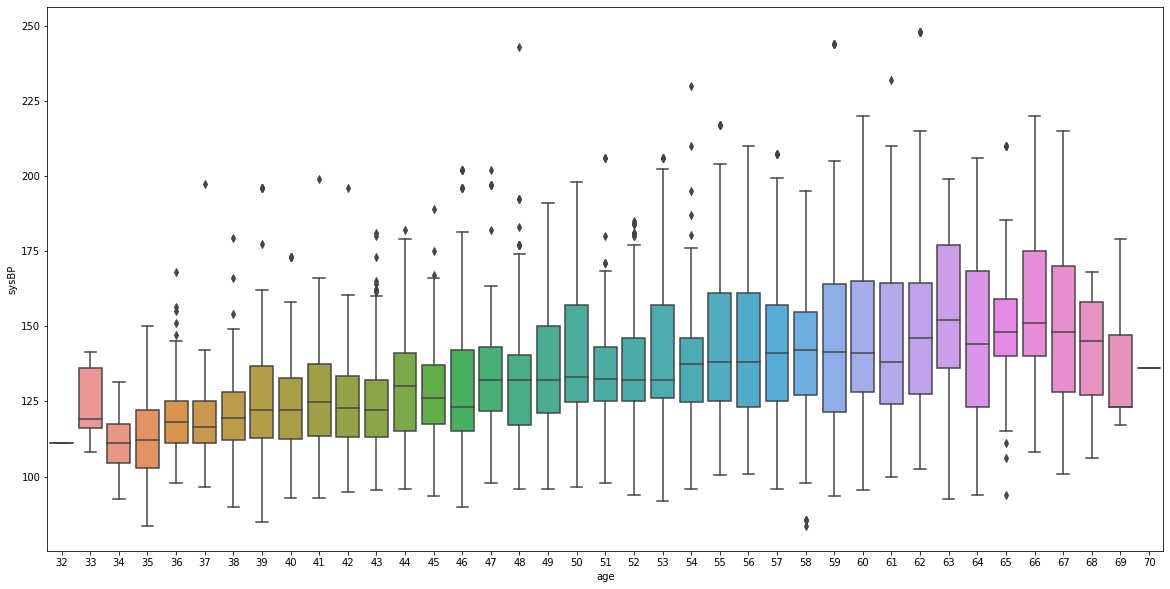

In [463]:
plt.figure(figsize=(20,10))
sn.boxplot(x="age",y="sysBP",data=df)
plt.show()

<b>Age and SysBP are positively correlated. Aged people seem to have a higher systolic bp as seen above, in general

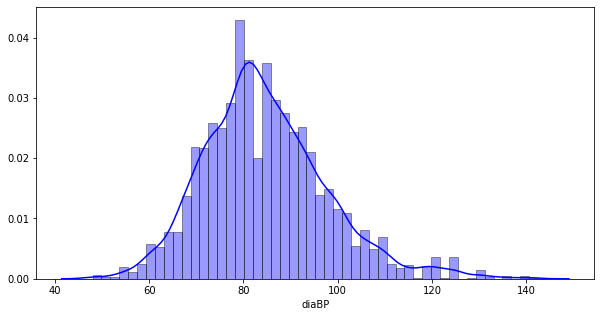

In [464]:
#Distribution of diastolic bp
plt.figure(figsize=(10,5))
sn.distplot(df["diaBP"],color='blue',hist_kws=dict(edgecolor="black", linewidth=1))
plt.show()

<b> Most people have diastolic bp of around 80

In [465]:
df["sysBP"].describe()

count    6350.000000
mean      136.993228
std        24.429893
min        83.500000
25%       120.000000
50%       132.000000
75%       150.000000
max       248.000000
Name: sysBP, dtype: float64

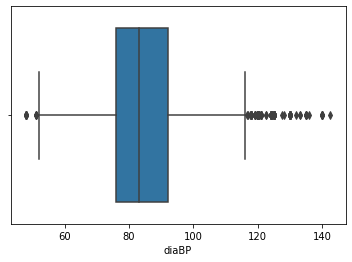

In [466]:
sn.boxplot(df['diaBP'])
plt.show()

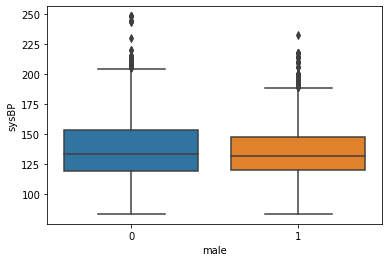

In [467]:
sn.boxplot(x="male",y="sysBP",data=df)
plt.show()

<b> Females have a higher diastolic bp

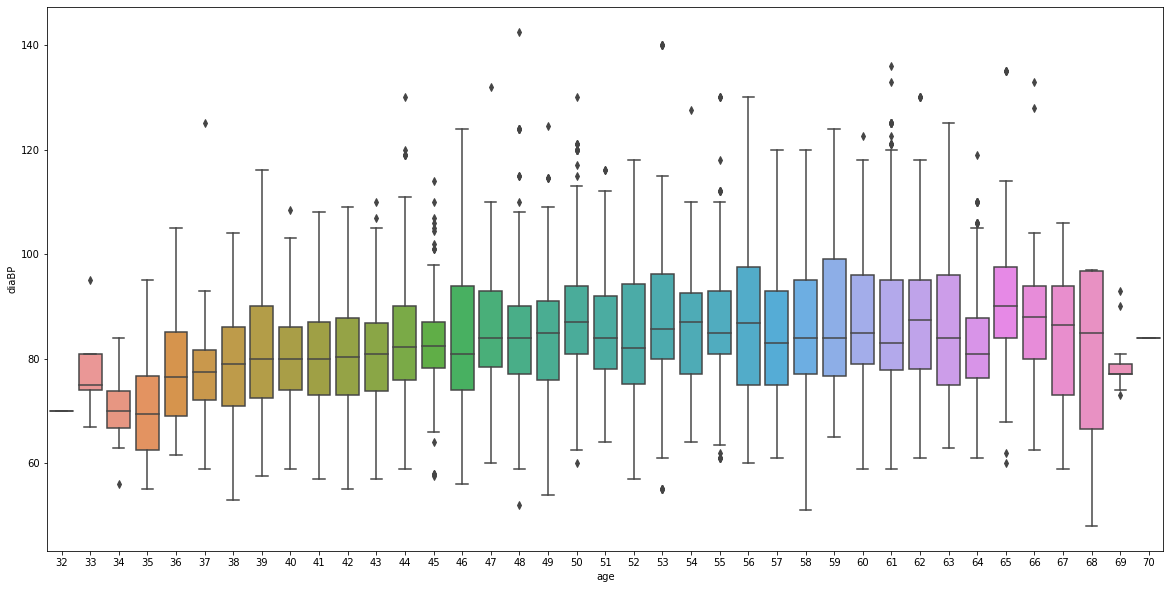

In [468]:
plt.figure(figsize=(20,10))
sn.boxplot(x="age",y="diaBP",data=df)
plt.show()

<b>Age and diaBP are very slightly positively correlated. Aged people seem to have a slightly higher diastolic bp as seen above, in general

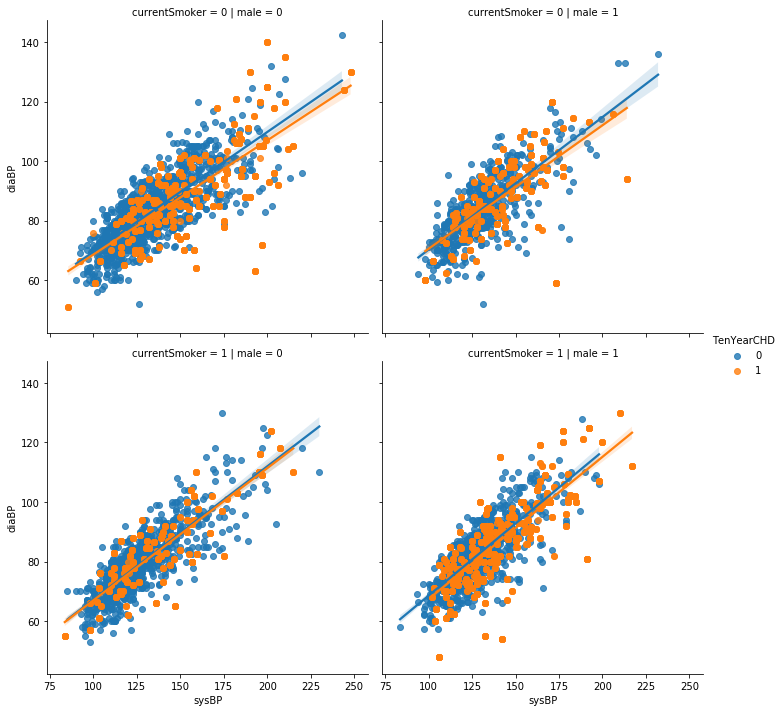

In [469]:
#sysBP vs diaBP with respect to currentSmoker and male attributes
sn.lmplot('sysBP', 'diaBP', 
           data=df,
           hue="TenYearCHD",
           col="male",row="currentSmoker")
plt.show()

<b>
    The above graph plots the relationship between systolic blood pressure and diastolic blood pressure for patients based on their gender and whether they are current smokers or not and plots the best fit line

# Feature Selection


In [470]:
#To idenfify the features that have larger contribution towards the outcome variable, Heart disease
X=df.iloc[:,0:14]
y=df.iloc[:,-1]


In [471]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [472]:
fit=best.fit(X,y)

In [473]:
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

In [474]:
#Join the two dataframes
scores=pd.concat([df_columns,df_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

         Feature        Score
9          sysBP  2079.301648
13       glucose  1360.260410
1            age   959.194386
8        totChol   812.581823
3     cigsPerDay   737.770516
10         diaBP   447.857441
6   prevalentHyp   227.235473
11           BMI    71.188381
4         BPMeds    66.204977
0           male    63.280053
7       diabetes    53.760101


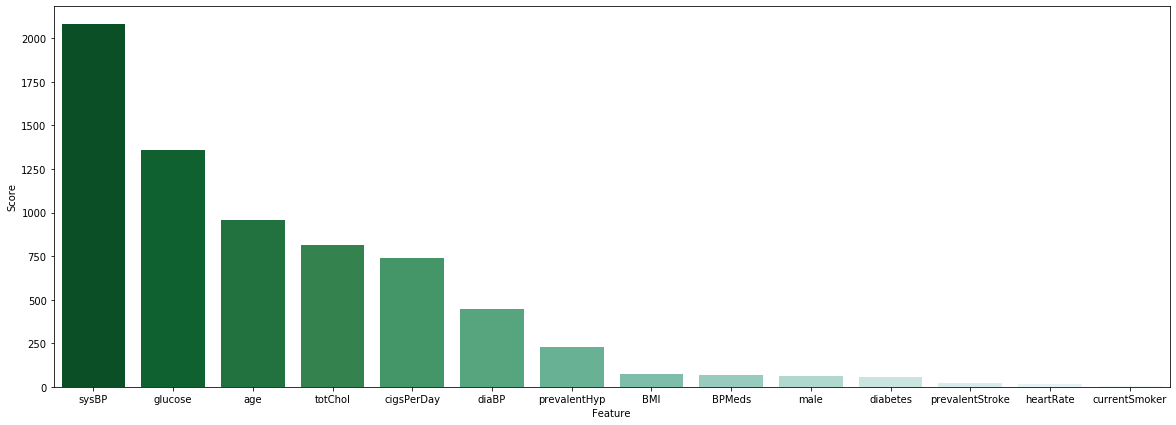

In [475]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7))
sn.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.show()

<B>Features and their respective scores

In [520]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'BMI',
 'BPMeds',
 'male']

<b> Only these features have strongest influence over the target variable. They are, in particular order:</b>
    <li>sysBP
        <li>glucose
            <li>age
                <li>totChol
                    <li>cigsPerDay
                        <li>diaBP
                            <li>prevalentHyp
                                <li>BMI
                                    <li>BPMeds
                                        <li>Male

In [477]:
df=df[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','BPMeds','male','BMI','TenYearCHD']]
df.head()

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,BPMeds,male,BMI,TenYearCHD
0,106.0,77.0,39,0.0,195.0,70.0,0,0.0,1,26.97,0
1,121.0,76.0,46,0.0,250.0,81.0,0,0.0,0,28.73,0
2,127.5,70.0,48,20.0,245.0,80.0,0,0.0,1,25.34,0
4,130.0,85.0,46,23.0,285.0,84.0,0,0.0,0,23.10,0
5,180.0,99.0,43,0.0,228.0,110.0,1,0.0,0,30.30,0


# Feature Scaling

In [478]:
#Perform feature scaling to scale our features for different models 
scaler=MinMaxScaler(feature_range=(0,1)) 
scaled_df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [479]:
scaled_df.describe()

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,BPMeds,male,BMI,TenYearCHD
count,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000
mean,0.325187,0.126785,0.513630,0.139874,0.363622,0.387552,0.395433,0.046142,0.494961,0.258474,0.499528
std,0.148510,0.092434,0.228308,0.177939,0.126591,0.139028,0.488982,0.209808,0.500014,0.103593,0.500039
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221884,0.090395,0.315789,0.000000,0.276353,0.296296,0.000000,0.000000,0.000000,0.188318,0.000000
50%,0.294833,0.107345,0.513158,0.014286,0.356125,0.370370,0.000000,0.000000,0.000000,0.249879,0.000000
75%,0.404255,0.135593,0.710526,0.285714,0.440883,0.465608,1.000000,0.000000,1.000000,0.315802,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [480]:
df.describe()

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,BPMeds,male,BMI,TenYearCHD
count,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000
mean,136.993228,84.881890,51.517953,9.791181,240.631339,84.623701,0.395433,0.046142,0.494961,26.204638,0.499528
std,24.429893,32.721541,8.675685,12.455731,44.433268,13.138156,0.488982,0.209808,0.500014,4.274266,0.500039
min,83.500000,40.000000,32.000000,0.000000,113.000000,48.000000,0.000000,0.000000,0.000000,15.540000,0.000000
25%,120.000000,72.000000,44.000000,0.000000,210.000000,76.000000,0.000000,0.000000,0.000000,23.310000,0.000000
50%,132.000000,78.000000,51.500000,1.000000,238.000000,83.000000,0.000000,0.000000,0.000000,25.850000,0.000000
75%,150.000000,88.000000,59.000000,20.000000,267.750000,92.000000,1.000000,0.000000,1.000000,28.570000,1.000000
max,248.000000,394.000000,70.000000,70.000000,464.000000,142.500000,1.000000,1.000000,1.000000,56.800000,1.000000


In [481]:
df=scaled_df

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,BPMeds,male,BMI,TenYearCHD
sysBP,1.000000,0.133707,0.392969,-0.095507,0.199492,0.778528,0.705833,0.296366,-0.057027,0.312718,0.274179
glucose,0.133707,1.000000,0.119129,-0.049083,0.081716,0.067058,0.087420,0.104860,0.012786,0.092341,0.130326
age,0.392969,0.119129,1.000000,-0.192491,0.208493,0.178286,0.321022,0.130249,-0.032965,0.129060,0.321570
cigsPerDay,-0.095507,-0.049083,-0.192491,1.000000,-0.033096,-0.055113,-0.093372,-0.074965,0.344504,-0.094789,0.085636
totChol,0.199492,0.081716,0.208493,-0.033096,1.000000,0.146117,0.138821,0.112657,-0.078162,0.110860,0.124896
diaBP,0.778528,0.067058,0.178286,-0.055113,0.146117,1.000000,0.600198,0.205146,0.044612,0.366479,0.185964
prevalentHyp,0.705833,0.087420,0.321022,-0.093372,0.138821,0.600198,1.000000,0.271951,-0.011496,0.293186,0.243293
BPMeds,0.296366,0.104860,0.130249,-0.074965,0.112657,0.205146,0.271951,1.000000,-0.066096,0.070719,0.104548
male,-0.057027,0.012786,-0.032965,0.344504,-0.078162,0.044612,-0.011496,-0.066096,1.000000,0.024412,0.140470
BMI,0.312718,0.092341,0.129060,-0.094789,0.110860,0.366479,0.293186,0.070719,0.024412,1.000000,0.126818


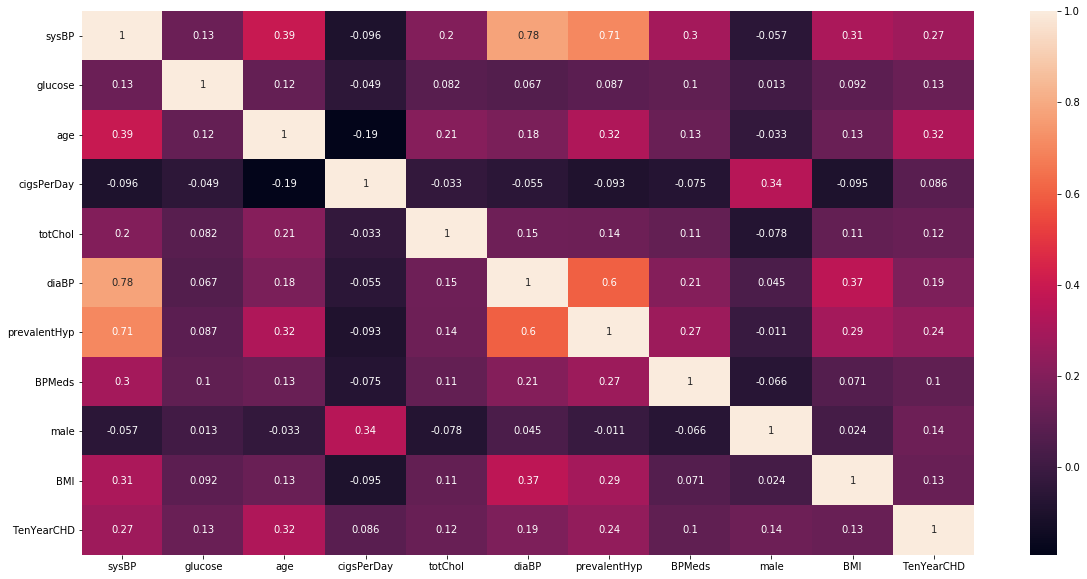

In [482]:
#Checking relationship between variables once again
cor=df.corr()
plt.figure(figsize=(20,10))
sn.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
cor

<Figure size 1440x1440 with 0 Axes>

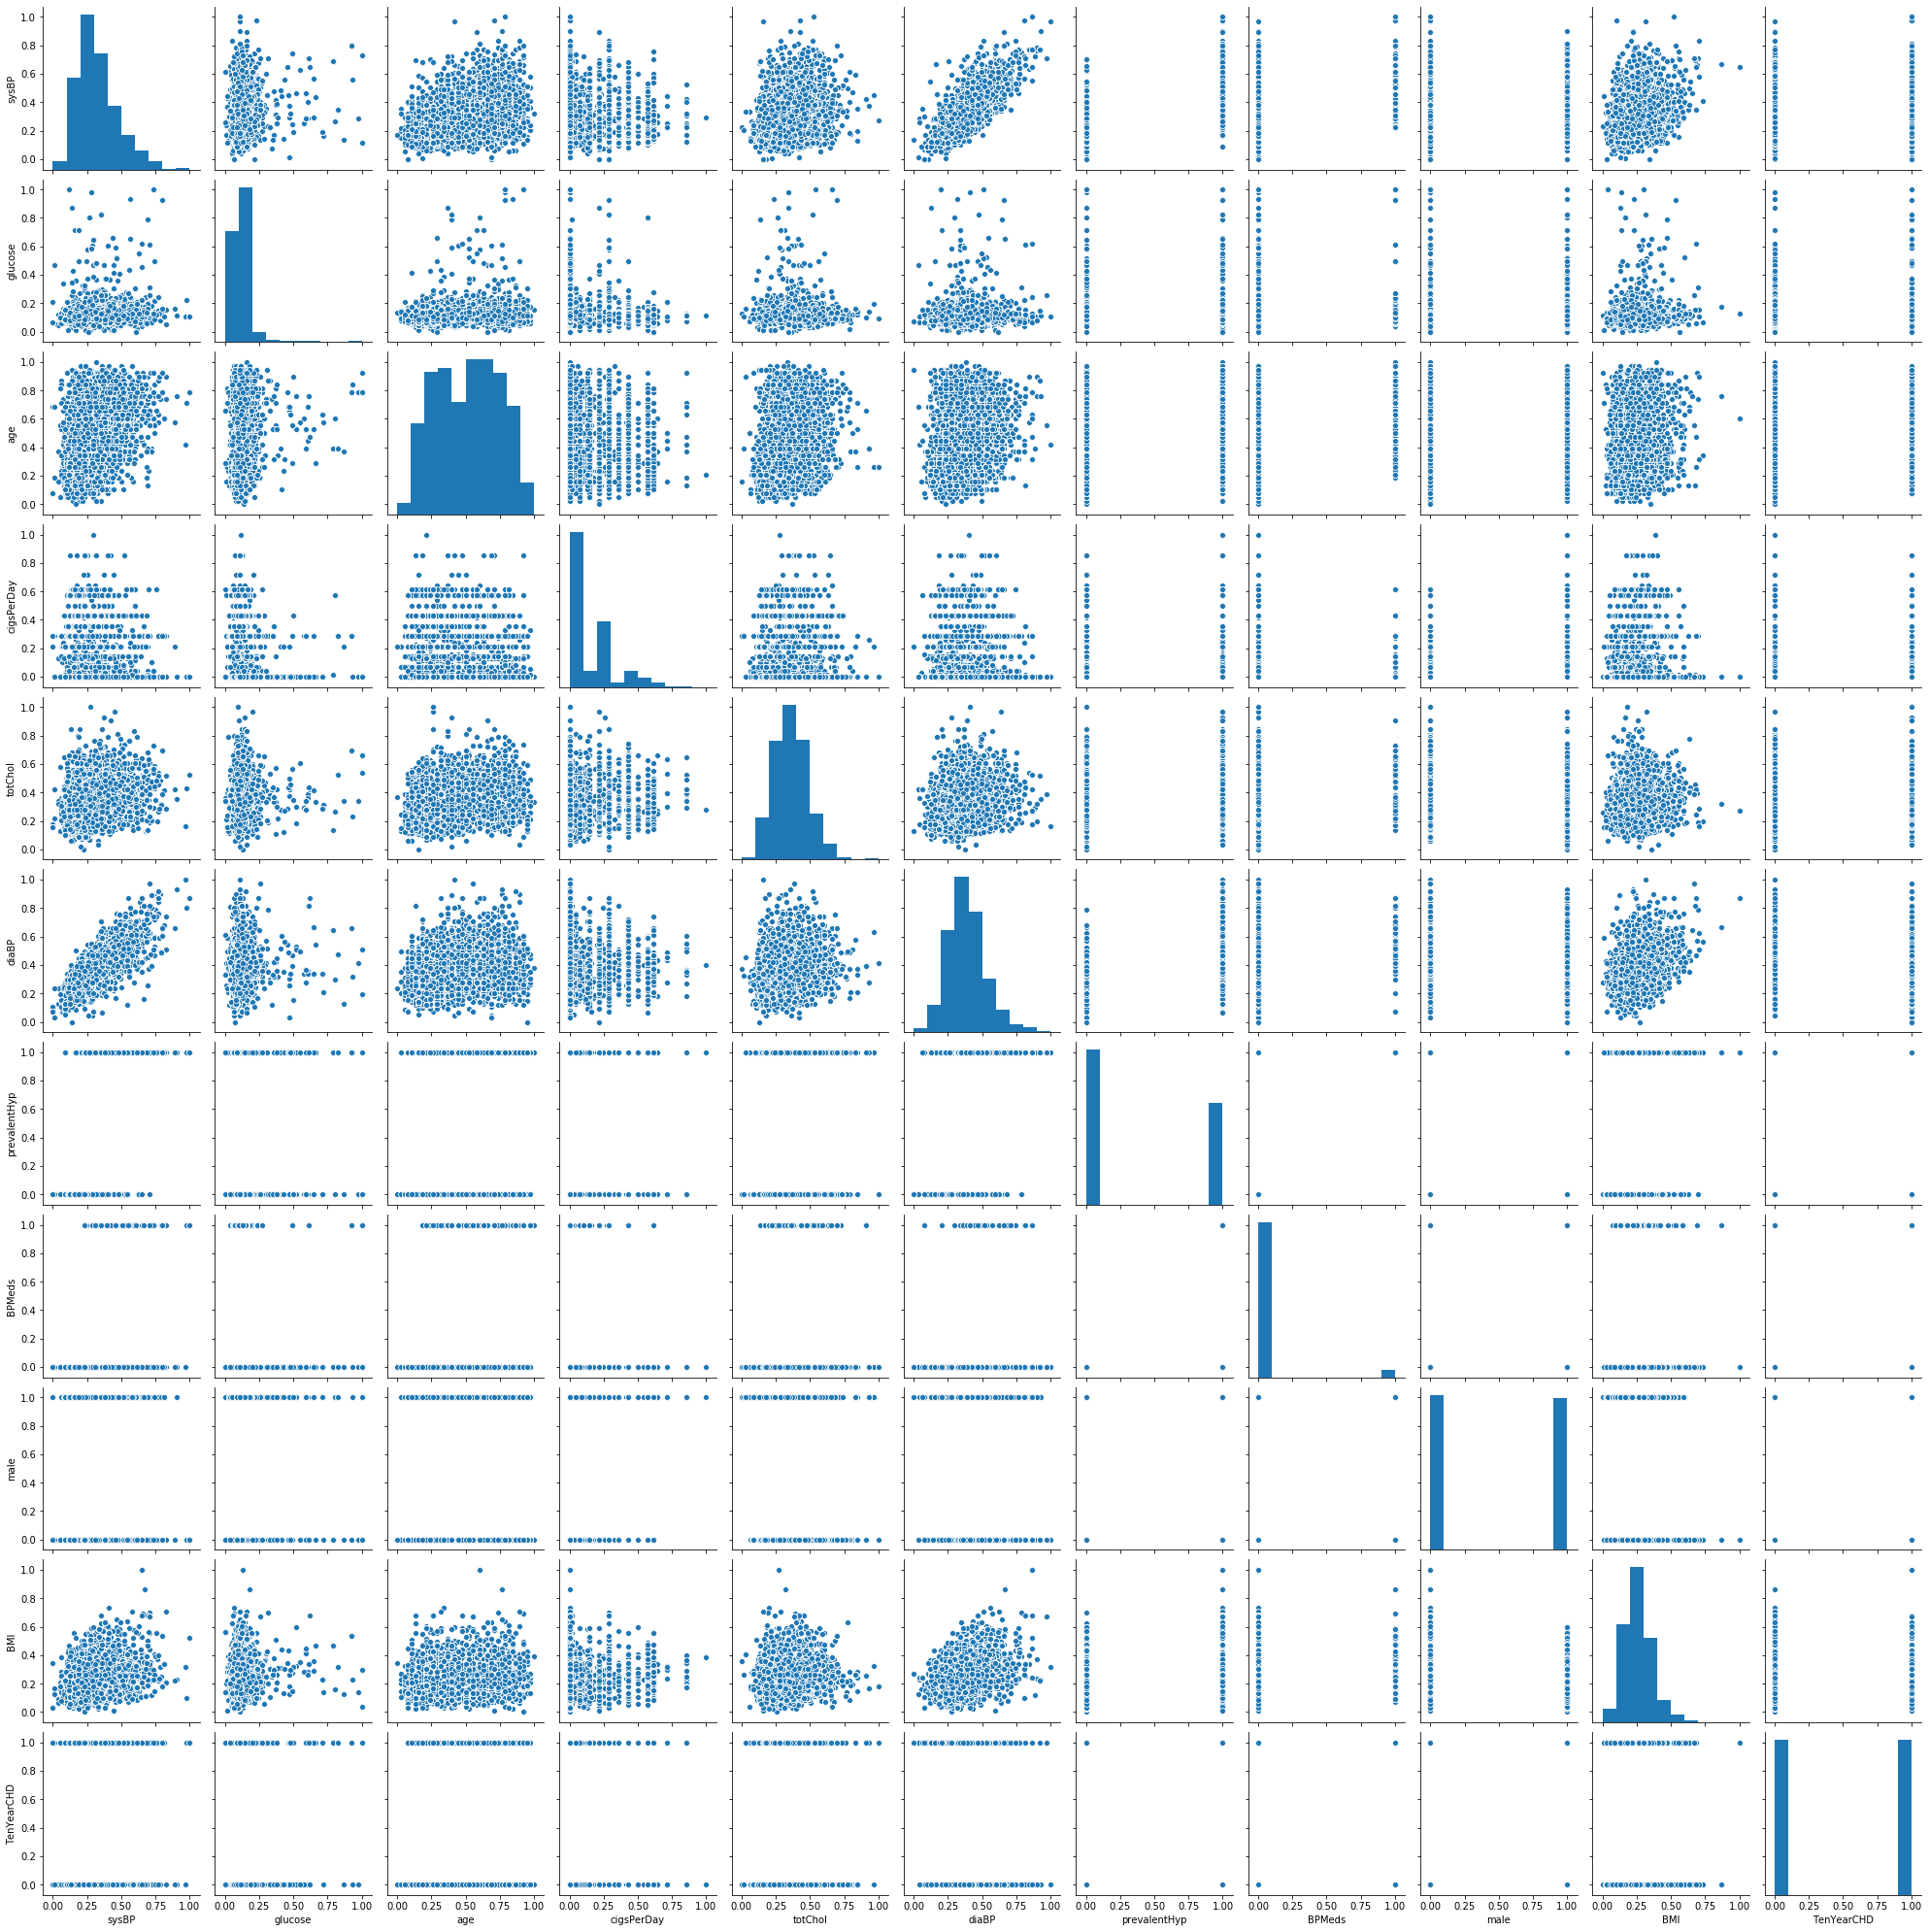

In [483]:
plt.figure(figsize=(20,20))
sn.pairplot(df)
plt.show()

<b> The above graphs describe the relationship between each attribute

# Train-Test split

In [484]:
#Train-test split
X=df.drop(['TenYearCHD'],axis=1)
y=df['TenYearCHD']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state=0)

# Fitting Models

## Logistic Regression

In [490]:
reg=LogisticRegression(random_state=0)
lr=reg.fit(X_train,y_train)

In [491]:
y_pred=lr.predict(X_test)

In [492]:
accuracy_score(y_test,y_pred)

0.6661417322834645

In [493]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[843, 430],
       [418, 849]], dtype=int64)

In [494]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.66      0.67      1273
         1.0       0.66      0.67      0.67      1267

    accuracy                           0.67      2540
   macro avg       0.67      0.67      0.67      2540
weighted avg       0.67      0.67      0.67      2540



## KNeighbors Classifier

In [498]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [499]:
y_pred=knn.predict(X_test)

In [500]:
accuracy_score(y_test,y_pred)

0.8633858267716535

In [501]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[1045,  228],
       [ 119, 1148]], dtype=int64)

In [502]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86      1273
         1.0       0.83      0.91      0.87      1267

    accuracy                           0.86      2540
   macro avg       0.87      0.86      0.86      2540
weighted avg       0.87      0.86      0.86      2540



## Decision Tree

In [503]:
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [504]:
y_pred=dtc.predict(X_test)

In [505]:
accuracy_score(y_test,y_pred)

0.8921259842519685

In [506]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[1018,  255],
       [  19, 1248]], dtype=int64)

In [507]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.80      0.88      1273
         1.0       0.83      0.99      0.90      1267

    accuracy                           0.89      2540
   macro avg       0.91      0.89      0.89      2540
weighted avg       0.91      0.89      0.89      2540



## Gradient Boosting

In [508]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()
clf.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>

### Hyperparameter tuning using Randomized search Cross Validation

In [249]:
#Number of trees
n_estimators = [int(i) for i in np.linspace(start=100,stop=1000,num=10)]
#Number of features to consider at every split
max_features = ['auto','sqrt']
#Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(10, 100, num=10)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split=[2,5,10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [252]:
gb=GradientBoostingClassifier(random_state=0)
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=random_grid,
                              n_iter=100, scoring='f1', 
                              cv=3, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

In [253]:
# Fit the random search model
gb_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.4min finished


In [254]:
gb_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40}

In [509]:
clf=GradientBoostingClassifier(n_estimators=900, max_depth=40, min_samples_split=5,random_state=0)

In [510]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=40,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=900,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [511]:
y_pred=clf.predict(X_test)

In [512]:
accuracy_score(y_test,y_pred)

0.8909448818897637

In [513]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[1017,  256],
       [  21, 1246]], dtype=int64)

In [514]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.80      0.88      1273
         1.0       0.83      0.98      0.90      1267

    accuracy                           0.89      2540
   macro avg       0.90      0.89      0.89      2540
weighted avg       0.90      0.89      0.89      2540



# RandomForest Classifier

In [241]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 900, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Hyperparameter tuning using Randomized search Cross Validation

In [226]:
#Number of trees
n_estimators = [int(i) for i in np.linspace(start=100,stop=1000,num=10)]
#Number of features to consider at every split
max_features = ['auto','sqrt']
#Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(10, 100, num=10)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split=[2,5,10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]
#Method of selecting samples for training each tree
bootstrap = [True, False]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [228]:
rf=RandomForestClassifier(random_state=0)
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter=100, scoring='f1', 
                              cv=3, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

In [229]:
# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.0min finished


In [230]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [515]:
rfc=RandomForestClassifier(n_estimators=900,max_depth=50,random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [516]:
y_pred=rfc.predict(X_test)

In [517]:
accuracy_score(y_test,y_pred)

0.931496062992126

In [518]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[1131,  142],
       [  32, 1235]], dtype=int64)

In [519]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      1273
         1.0       0.90      0.97      0.93      1267

    accuracy                           0.93      2540
   macro avg       0.93      0.93      0.93      2540
weighted avg       0.93      0.93      0.93      2540



# Accuracy Scores

<b><li> Logistic Regression- 66.61%
   <li> KNeighbors Classification- 85.34%
   <li> Decision Tree- 89.21%
   <li> Gradient Boosting Classification- 89.09%
   <li> Random Forest Classification- 93.15%

### We can conclude that, Random Forest Classification model is best suited for this dataset.